# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [1]:
'''
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly
'''

'\n!pip install pycountry_convert \n!pip install folium\n!pip install seaborn\n!pip install plotly\n'

In [2]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [3]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## Have a look at the general data:

In [4]:
confirmed_df.tail(5)

Province/State      Country/Region        Lat        Long  1/22/20  \
268            NaN             Vietnam  14.058324  108.277199        0   
269            NaN  West Bank and Gaza  31.952200   35.233200        0   
270            NaN               Yemen  15.552727   48.516388        0   
271            NaN              Zambia -13.133897   27.849332        0   
272            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/13/21  2/14/21  \
268        2        2        2        2        2  ...     2195     2228   
269        0        0        0        0        0  ...   166800   167604   
270        0        0        0        0        0  ...     2136     2145   
271        0        0        0        0        0  ...    68454    69437   
272        0        0        0        0        0  ...    35104    35172   

     2/15/21  2/16/21  2/17/21  2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  
268     2269     2311     2329     2347     2362     2368     2383     2392  
269   168444   169487   170527   171154   171717   172315   173635   174969  
270     2145     2148     2151     2154     2157     2157     2165     2176  
271    70248    70823    71677    72467    73203    73894    74503    75027  
272    35222    35315    35423    35543    35710    35768    35796    35862  

[5 rows x 402 columns]

In [5]:
deaths_df.tail(5)

Province/State      Country/Region        Lat        Long  1/22/20  \
268            NaN             Vietnam  14.058324  108.277199        0   
269            NaN  West Bank and Gaza  31.952200   35.233200        0   
270            NaN               Yemen  15.552727   48.516388        0   
271            NaN              Zambia -13.133897   27.849332        0   
272            NaN            Zimbabwe -19.015438   29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  2/13/21  2/14/21  \
268        0        0        0        0        0  ...       35       35   
269        0        0        0        0        0  ...     1930     1933   
270        0        0        0        0        0  ...      616      617   
271        0        0        0        0        0  ...      940      951   
272        0        0        0        0        0  ...     1398     1400   

     2/15/21  2/16/21  2/17/21  2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  
268       35       35       35       35       35       35       35       35  
269     1936     1942     1948     1956     1961     1971     1976     1986  
270      617      618      618      618      618      618      619      619  
271      959      974      983      991     1002     1016     1020     1031  
272     1410     1414     1418     1420     1430     1432     1436     1441  

[5 rows x 402 columns]

In [6]:
recoveries_df.head(1)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/13/21  2/14/21  2/15/21  \
0        0        0        0        0  ...    48392    48395    48433   

   2/16/21  2/17/21  2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  
0    48514    48626    48798    48803    48820    48834    48895  

[1 rows x 402 columns]

#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [7]:
# confirmed & deaths have 273 rows
# recoveries has 257 rows, so I have to group by 3 dataframes with 'Country/Region'

cols = confirmed_df.keys()
confirmed = confirmed_df.groupby('Country/Region').sum().loc[:, cols[4]:cols[-1]]
deaths = deaths_df.groupby('Country/Region').sum().loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.groupby('Country/Region').sum().loc[:, cols[4]:cols[-1]]
active = confirmed - deaths - recoveries
dates = confirmed.keys()

# total cases confirmed until now
total_cases = confirmed.sum()
# total deaths 
total_deaths = deaths.sum()
total_recovered = recoveries.sum() 
total_active = confirmed.sum() - deaths.sum() - recoveries.sum()
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

print (datetime.now())

2021-02-24 02:45:50.743457


In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  111721885
Total death cases:  2474178
Total recoveries cases:  63016505
Total active cases:  46231202


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

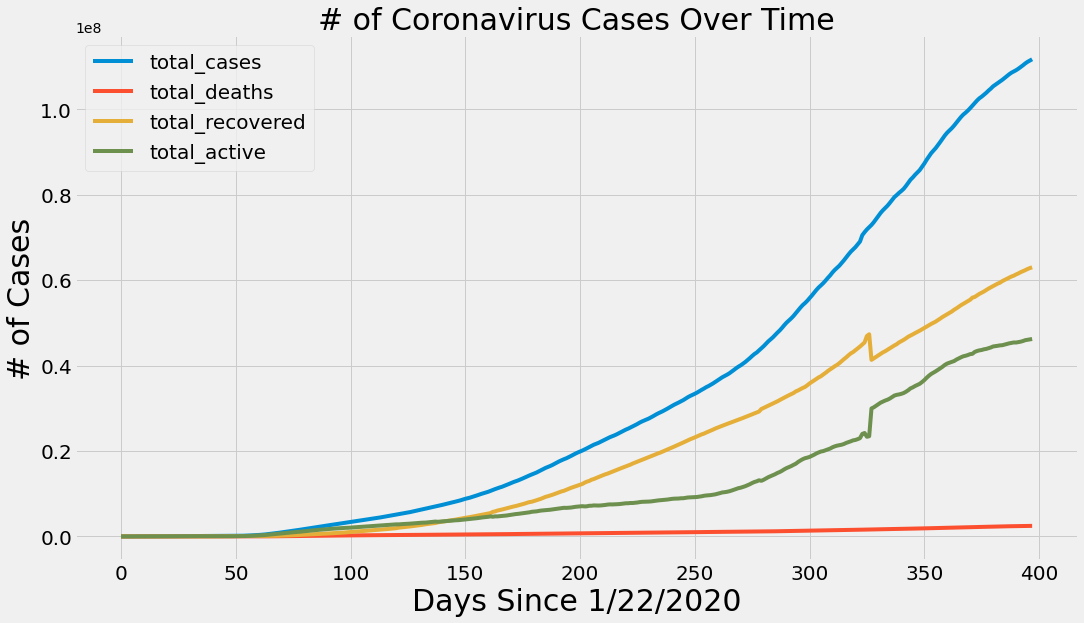

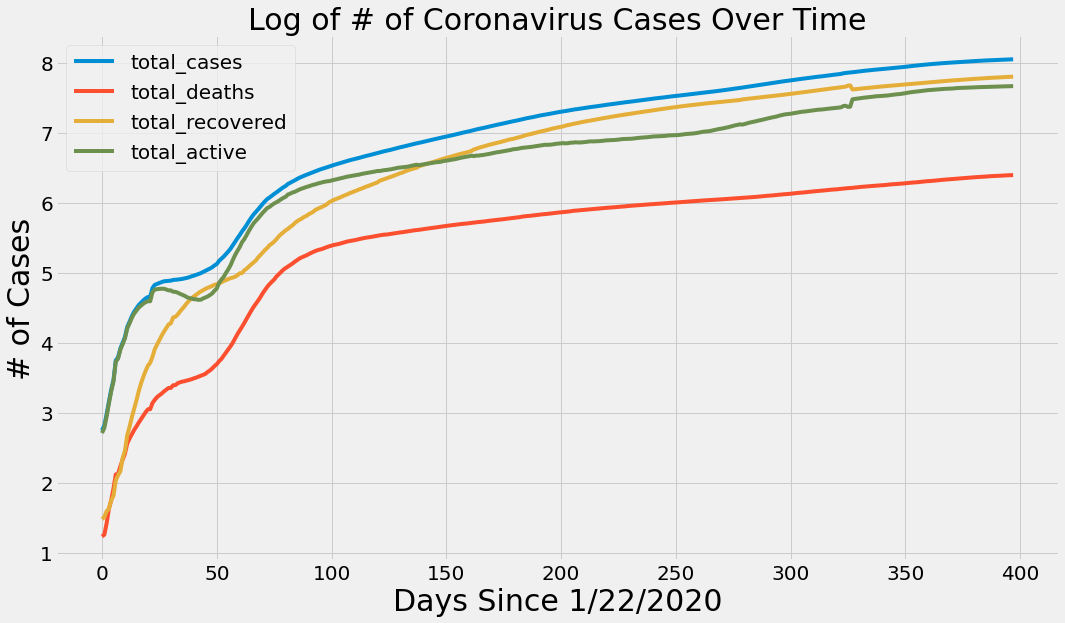

In [9]:
#Insert your code here:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(total_cases))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.plot(adjusted_dates, np.log10(total_active))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['total_cases', 'total_deaths', 'total_recovered', 'total_active'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

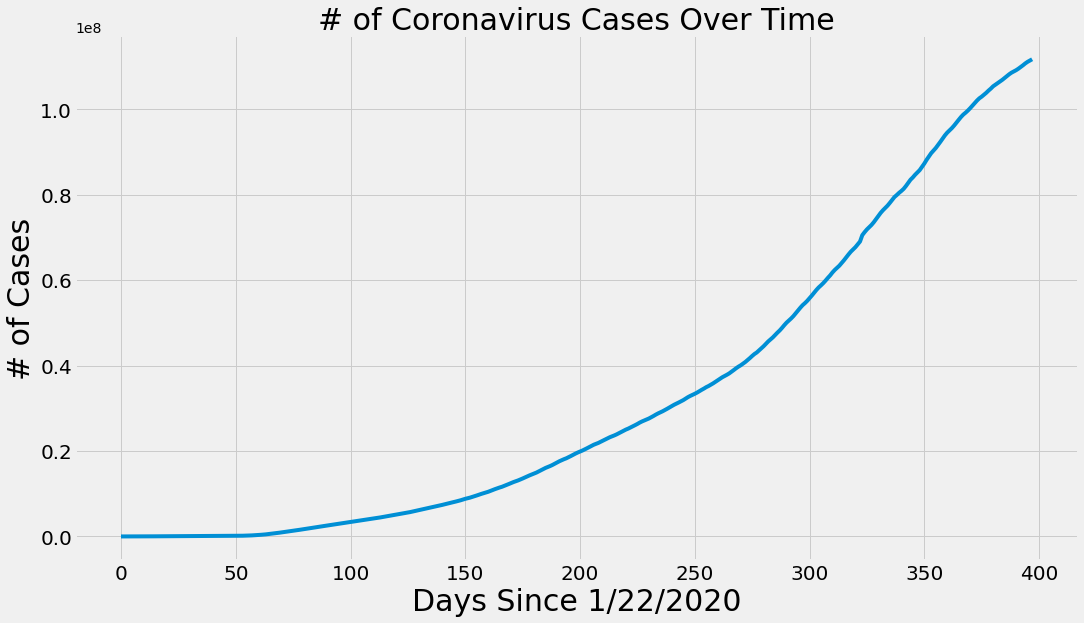

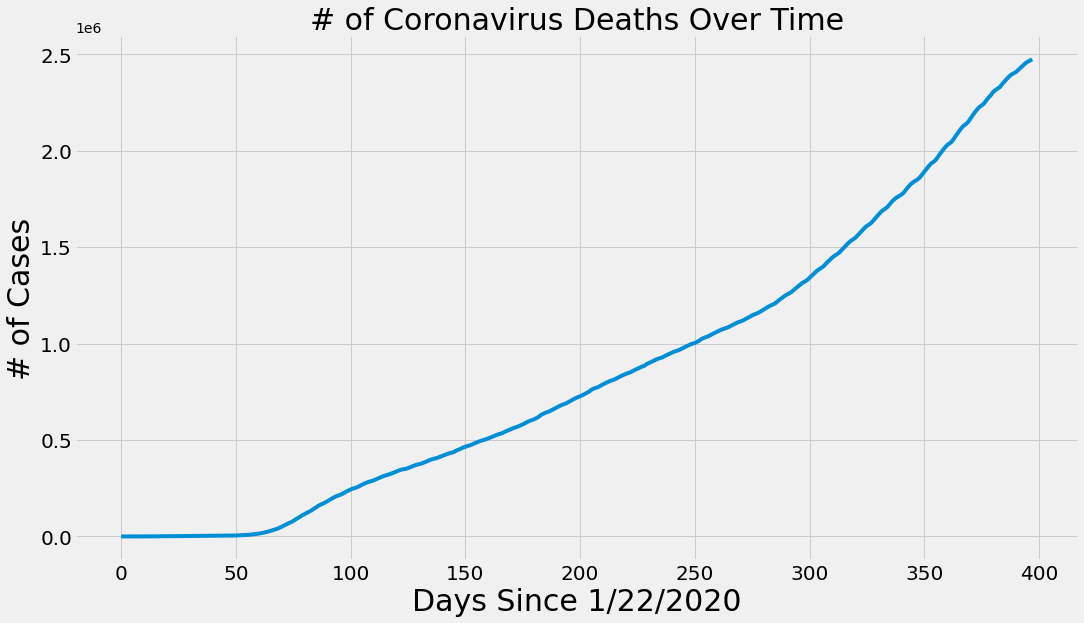

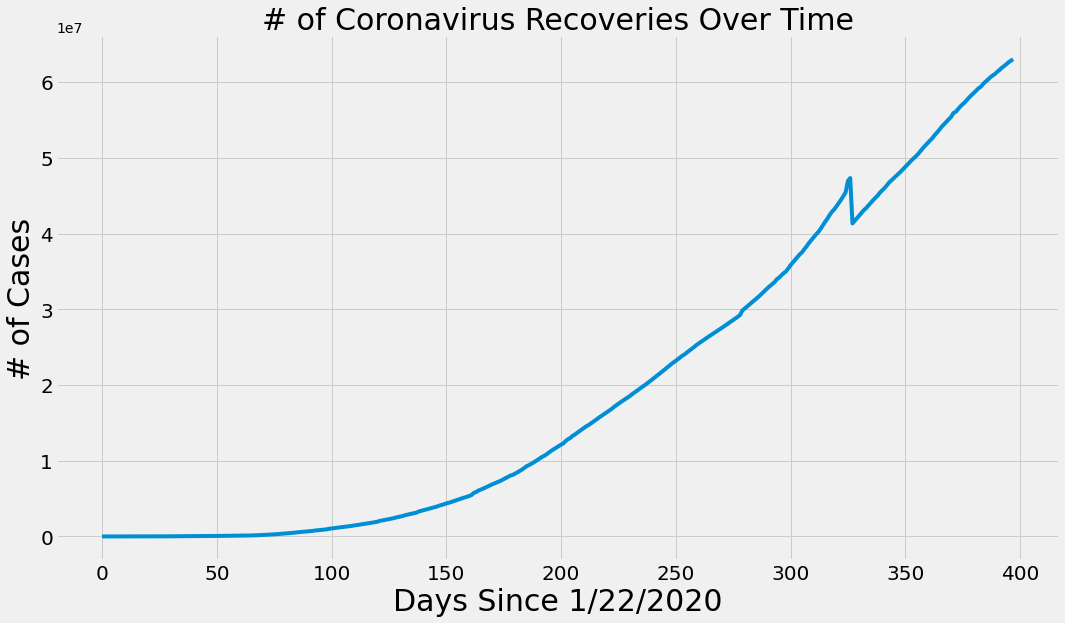

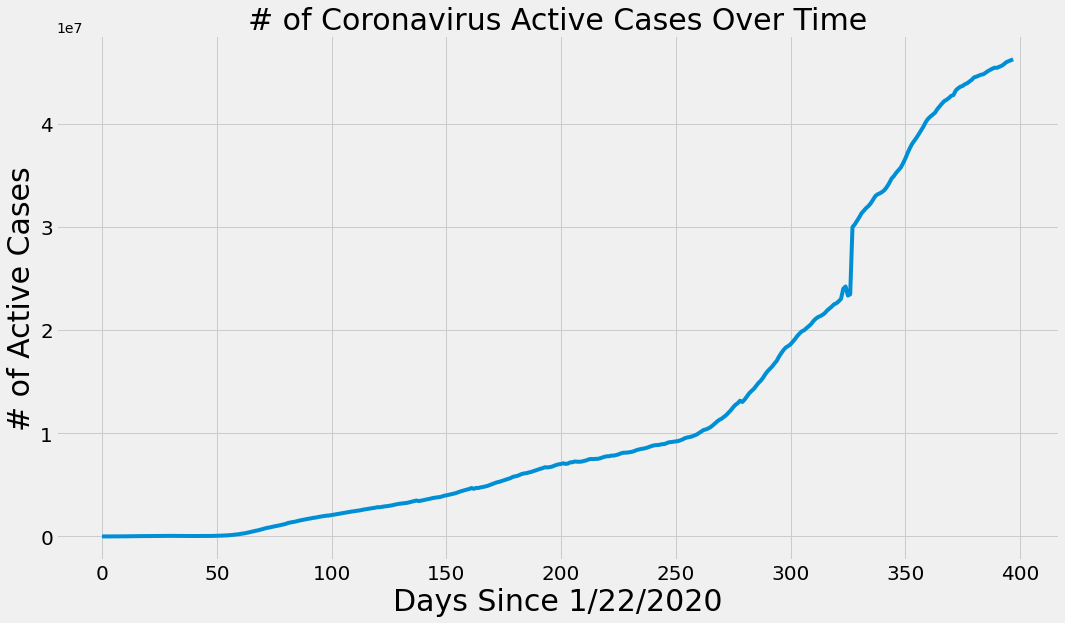

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths)
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_recovered)
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_active)
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [11]:
# Insert your code here:

# daily result = subtraction by the previous column with current column
daily_total_cases = confirmed.diff(axis = 1, periods = 1).sum()
daily_total_deaths = deaths.diff(axis = 1, periods = 1).sum()
daily_total_recovered = recoveries.diff(axis = 1, periods = 1).sum()
daily_total_active = active.diff(axis = 1, periods = 1).sum()

## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

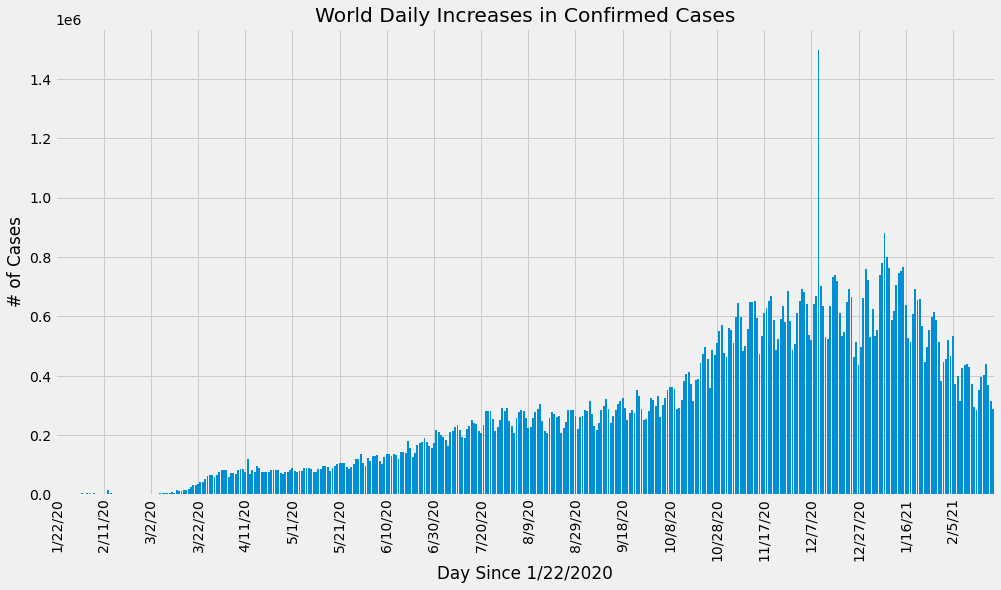

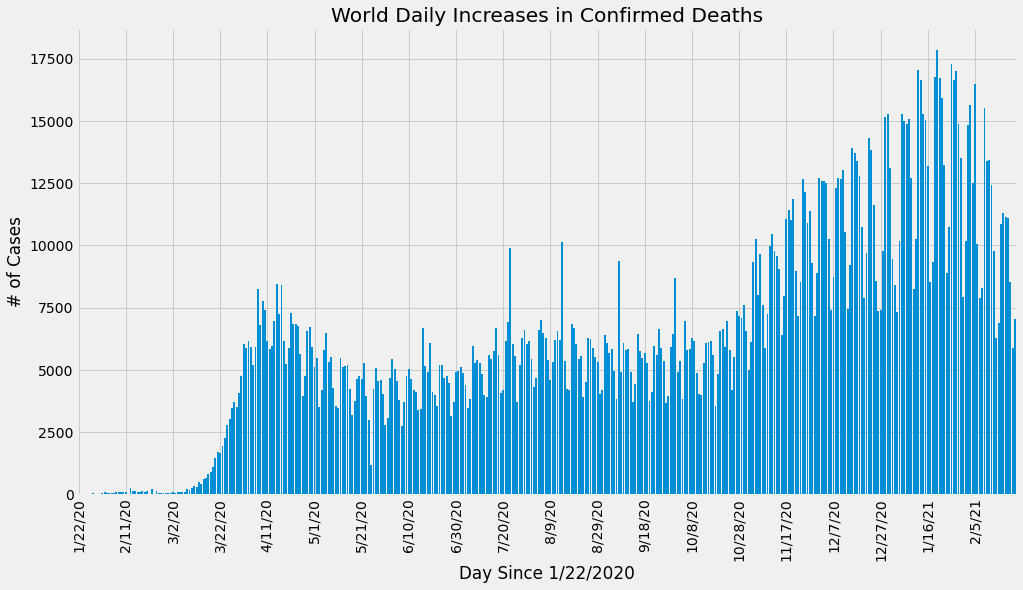

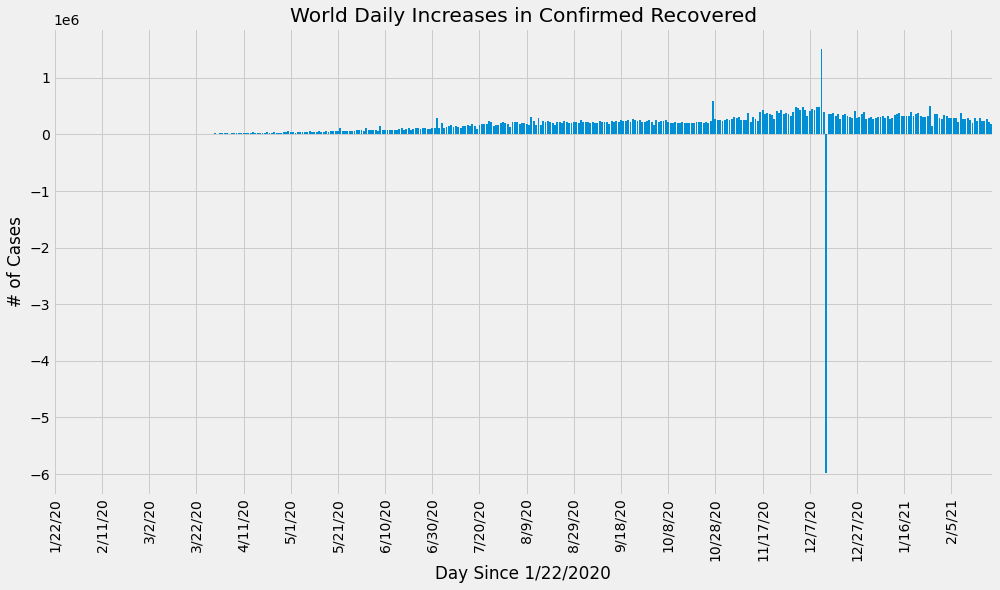

In [12]:
# World Daily Increases in Confirmed Cases
daily_total_cases.plot(kind='bar',width=0.8, figsize=(15, 8))

locs, labels = plt.xticks()
N = 20
plt.xticks(locs[::N])

plt.title('World Daily Increases in Confirmed Cases')
plt.ylabel('# of Cases')
plt.xlabel('Day Since 1/22/2020')

plt.show()

#World Daily Increases in Confirmed Deaths
daily_total_deaths.plot(kind='bar',width=0.8, figsize=(15, 8))

locs, labels = plt.xticks()
N = 20
plt.xticks(locs[::N])

plt.title('World Daily Increases in Confirmed Deaths')
plt.ylabel('# of Cases')
plt.xlabel('Day Since 1/22/2020')

plt.show()

# World Daily Increases in Confirmed Recovered
daily_total_recovered.plot(kind='bar',width=0.8, figsize=(15, 8))

locs, labels = plt.xticks()
N = 20
plt.xticks(locs[::N])

plt.title('World Daily Increases in Confirmed Recovered')
plt.ylabel('# of Cases')
plt.xlabel('Day Since 1/22/2020')

plt.show()

# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [13]:
#Insert your code here:
mortality_rate = (deaths.sum()/confirmed.sum())*100
mortality_rate

1/22/20    3.052065
1/23/20    2.748092
1/24/20    2.763018
1/25/20    2.930914
1/26/20    2.644004
             ...   
2/18/21    2.213438
2/19/21    2.214684
2/20/21    2.214968
2/21/21    2.214009
2/22/21    2.214587
Length: 398, dtype: float64

In [14]:
recovery_rate = (recoveries.sum()/confirmed.sum())*100
recovery_rate

1/22/20     5.385996
1/23/20     4.885496
1/24/20     4.144527
1/25/20     2.930914
1/26/20     2.644004
             ...    
2/18/21    56.307655
2/19/21    56.296118
2/20/21    56.350807
2/21/21    56.387141
2/22/21    56.404799
Length: 398, dtype: float64

# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

Text(0.5, 0, 'Day Since 1/22/2020')

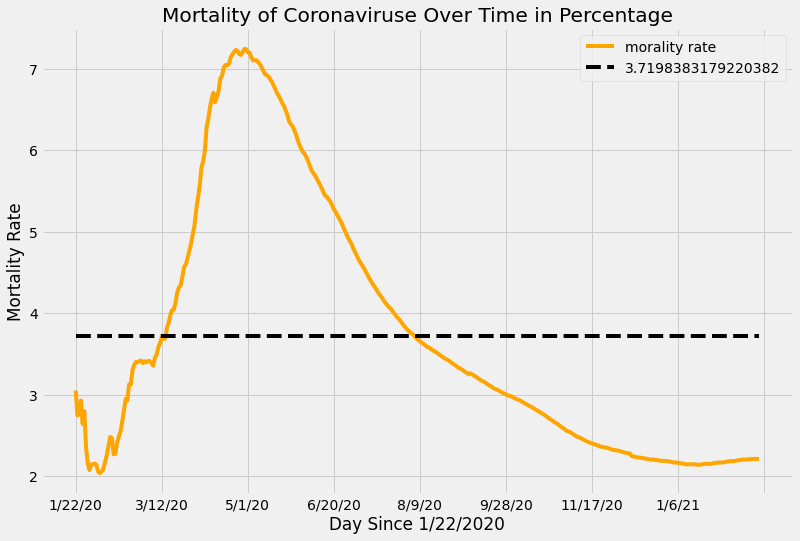

In [15]:
#Insert your code here:
fig,ax = plt.subplots()

mortality_rate.plot(kind='line', label='morality rate', color='orange', figsize=(12,8))
mean_mortality = [np.mean(mortality_rate)]*len(mortality_rate)
mean_line = ax.plot(mean_mortality, label=np.mean(mortality_rate),color='Black', linestyle='--')

legend = ax.legend(loc='upper right')

plt.title('Mortality of Coronaviruse Over Time in Percentage')
plt.ylabel('Mortality Rate')
plt.xlabel('Day Since 1/22/2020')

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

Text(0.5, 0, 'Day Since 1/22/2020')

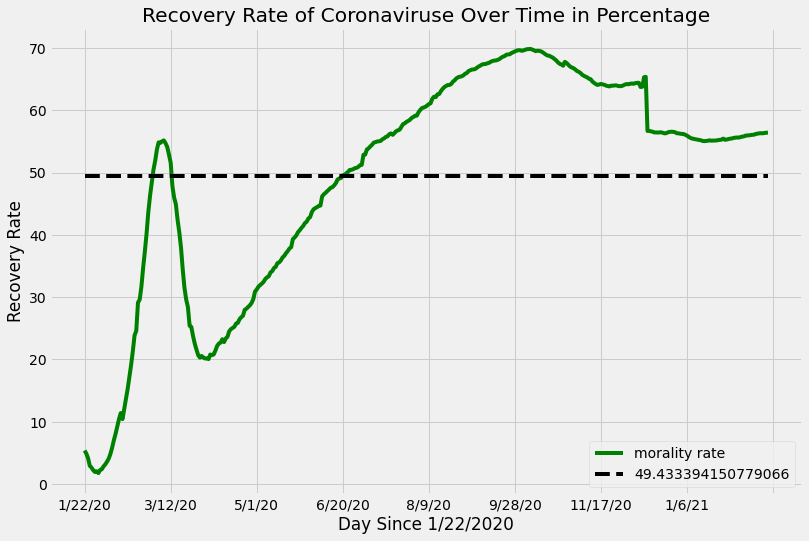

In [16]:
#Insert your code here:
fig,ax = plt.subplots()

recovery_rate.plot(kind='line', label='morality rate', color='Green', figsize=(12,8))
mean_recovery = [np.mean(recovery_rate)]*len(recovery_rate)
mean_line = ax.plot(mean_recovery, label=np.mean(recovery_rate),color='Black', linestyle='--')

legend = ax.legend(loc='lower right')

plt.title('Recovery Rate of Coronaviruse Over Time in Percentage')
plt.ylabel('Recovery Rate')
plt.xlabel('Day Since 1/22/2020')

#  5. Continent Analysis

## Data Prerocessing

In [17]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [18]:
#Insert your code here:
confirmed_df.insert(2,"Continent", [continents[country_to_continent_code(country)] for country in countries[:]])
deaths_df.insert(2,"Continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
recoveries_df.insert(2,"Continent",  [continents[country_to_continent_code(country)] for country in countries2[:]])
confirmed_df.head()

Province/State Country/Region Continent       Lat       Long  1/22/20  \
0            NaN    Afghanistan      Asia  33.93911  67.709953        0   
1            NaN        Albania    Europe  41.15330  20.168300        0   
2            NaN        Algeria    Africa  28.03390   1.659600        0   
3            NaN        Andorra    Europe  42.50630   1.521800        0   
4            NaN         Angola    Africa -11.20270  17.873900        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  2/13/21  2/14/21  2/15/21  \
0        0        0        0        0  ...    55473    55492    55514   
1        0        0        0        0  ...    91987    93075    93850   
2        0        0        0        0  ...   110513   110711   110894   
3        0        0        0        0  ...    10463    10503    10538   
4        0        0        0        0  ...    20329    20366    20381   

   2/16/21  2/17/21  2/18/21  2/19/21  2/20/21  2/21/21  2/22/21  
0    55518    55540    55557    55575    55580    55604    55617  
1    94651    95726    96838    97909    99062   100246   101285  
2   111069   111247   111418   111600   111764   111917   112094  
3    10555    10583    10610    10645    10672    10699    10712  
4    20389    20400    20452    20478    20499    20519    20548  

[5 rows x 403 columns]

# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [19]:
#Insert your code here:
countries_df = confirmed_df.groupby('Country/Region').mean()[['Lat', 'Long']]
countries_df.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries_df.index])
countries_df['Confirmed'] = confirmed_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Deaths'] = deaths_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Recoveries'] = recoveries_df.groupby('Country/Region').sum().iloc[:,-1]
countries_df['Active'] = countries_df['Confirmed'] - countries_df['Recoveries'] - countries_df['Deaths']
countries_df['Mortality Rate'] = round(countries_df['Deaths']/countries_df['Confirmed'] * 100, 2)
countries_df.tail()

Lat        Long continent  Confirmed  Deaths  \
Country/Region                                                           
Vietnam             14.058324  108.277199      Asia       2392      35   
West Bank and Gaza  31.952200   35.233200    Others     174969    1986   
Yemen               15.552727   48.516388      Asia       2176     619   
Zambia             -13.133897   27.849332    Africa      75027    1031   
Zimbabwe           -19.015438   29.154857    Africa      35862    1441   

                    Recoveries  Active  Mortality Rate  
Country/Region                                          
Vietnam                   1717     640            1.46  
West Bank and Gaza      162025   10958            1.14  
Yemen                     1432     125           28.45  
Zambia                   68928    5068            1.37  
Zimbabwe                 32216    2205            4.02

# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [20]:
#Insert your code here:
continents_df = countries_df.copy().drop(['Lat', 'Long'], axis = 1).groupby(["continent"]).sum()
continents_df["Mortality Rate"] = np.round(100*continents_df["Deaths"]/continents_df["Confirmed"],2)
continents_df.head()

Confirmed  Deaths  Recoveries    Active  Mortality Rate
continent                                                             
Africa           3838419  101672     3392719    344028            2.65
Asia            24299703  387880    22876078   1035745            1.60
Australia          32439     947       26084      5408            2.92
Europe          33326012  793729    17115887  15416396            2.38
North America   32382406  728123     3460191  28194092            2.25

## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [21]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

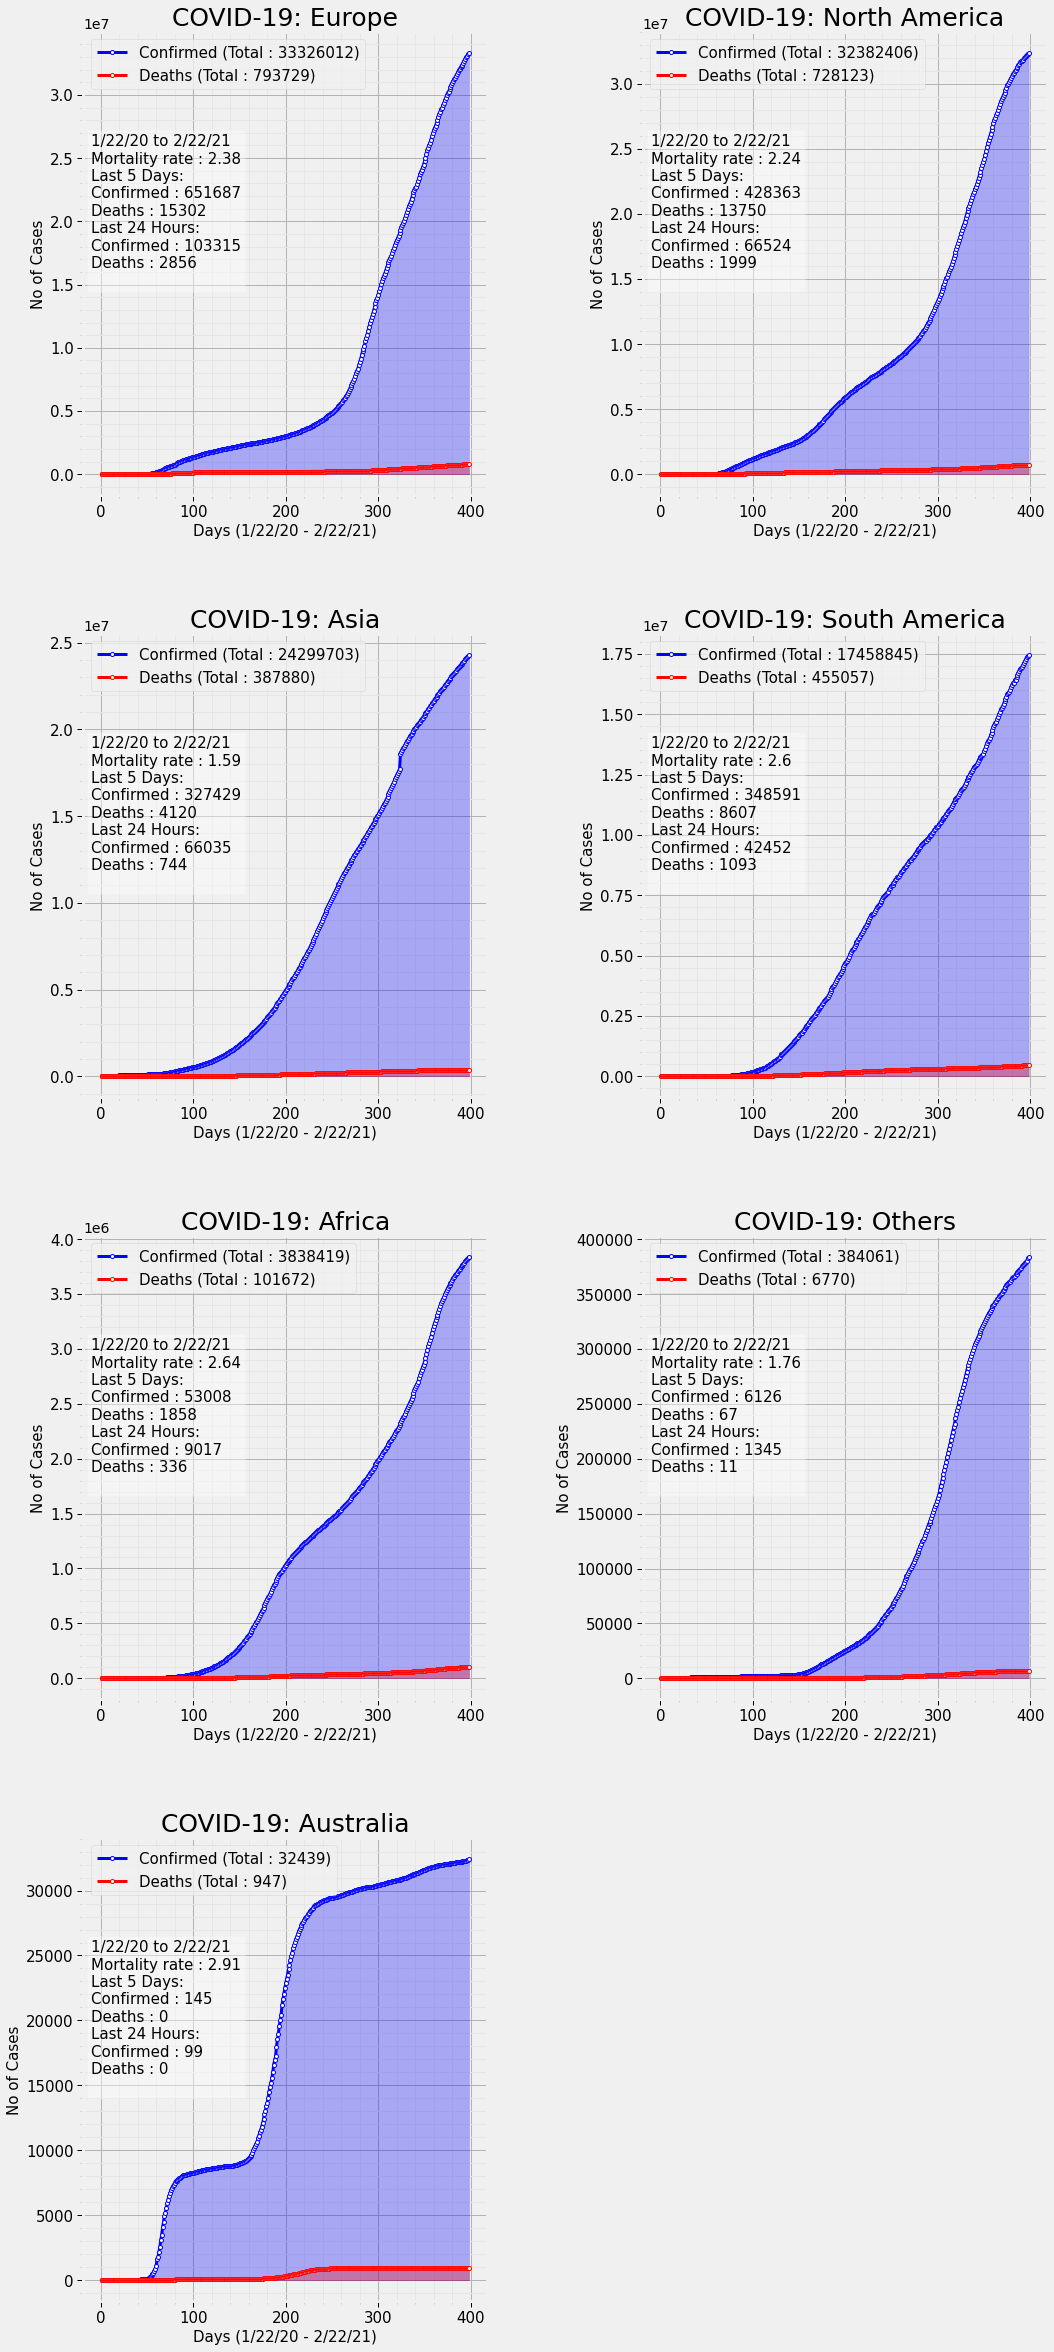

In [22]:
# Insert your code here:
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index
#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, continent = continent,figure = [f,rows,cols, i+1])
plt.show()


**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

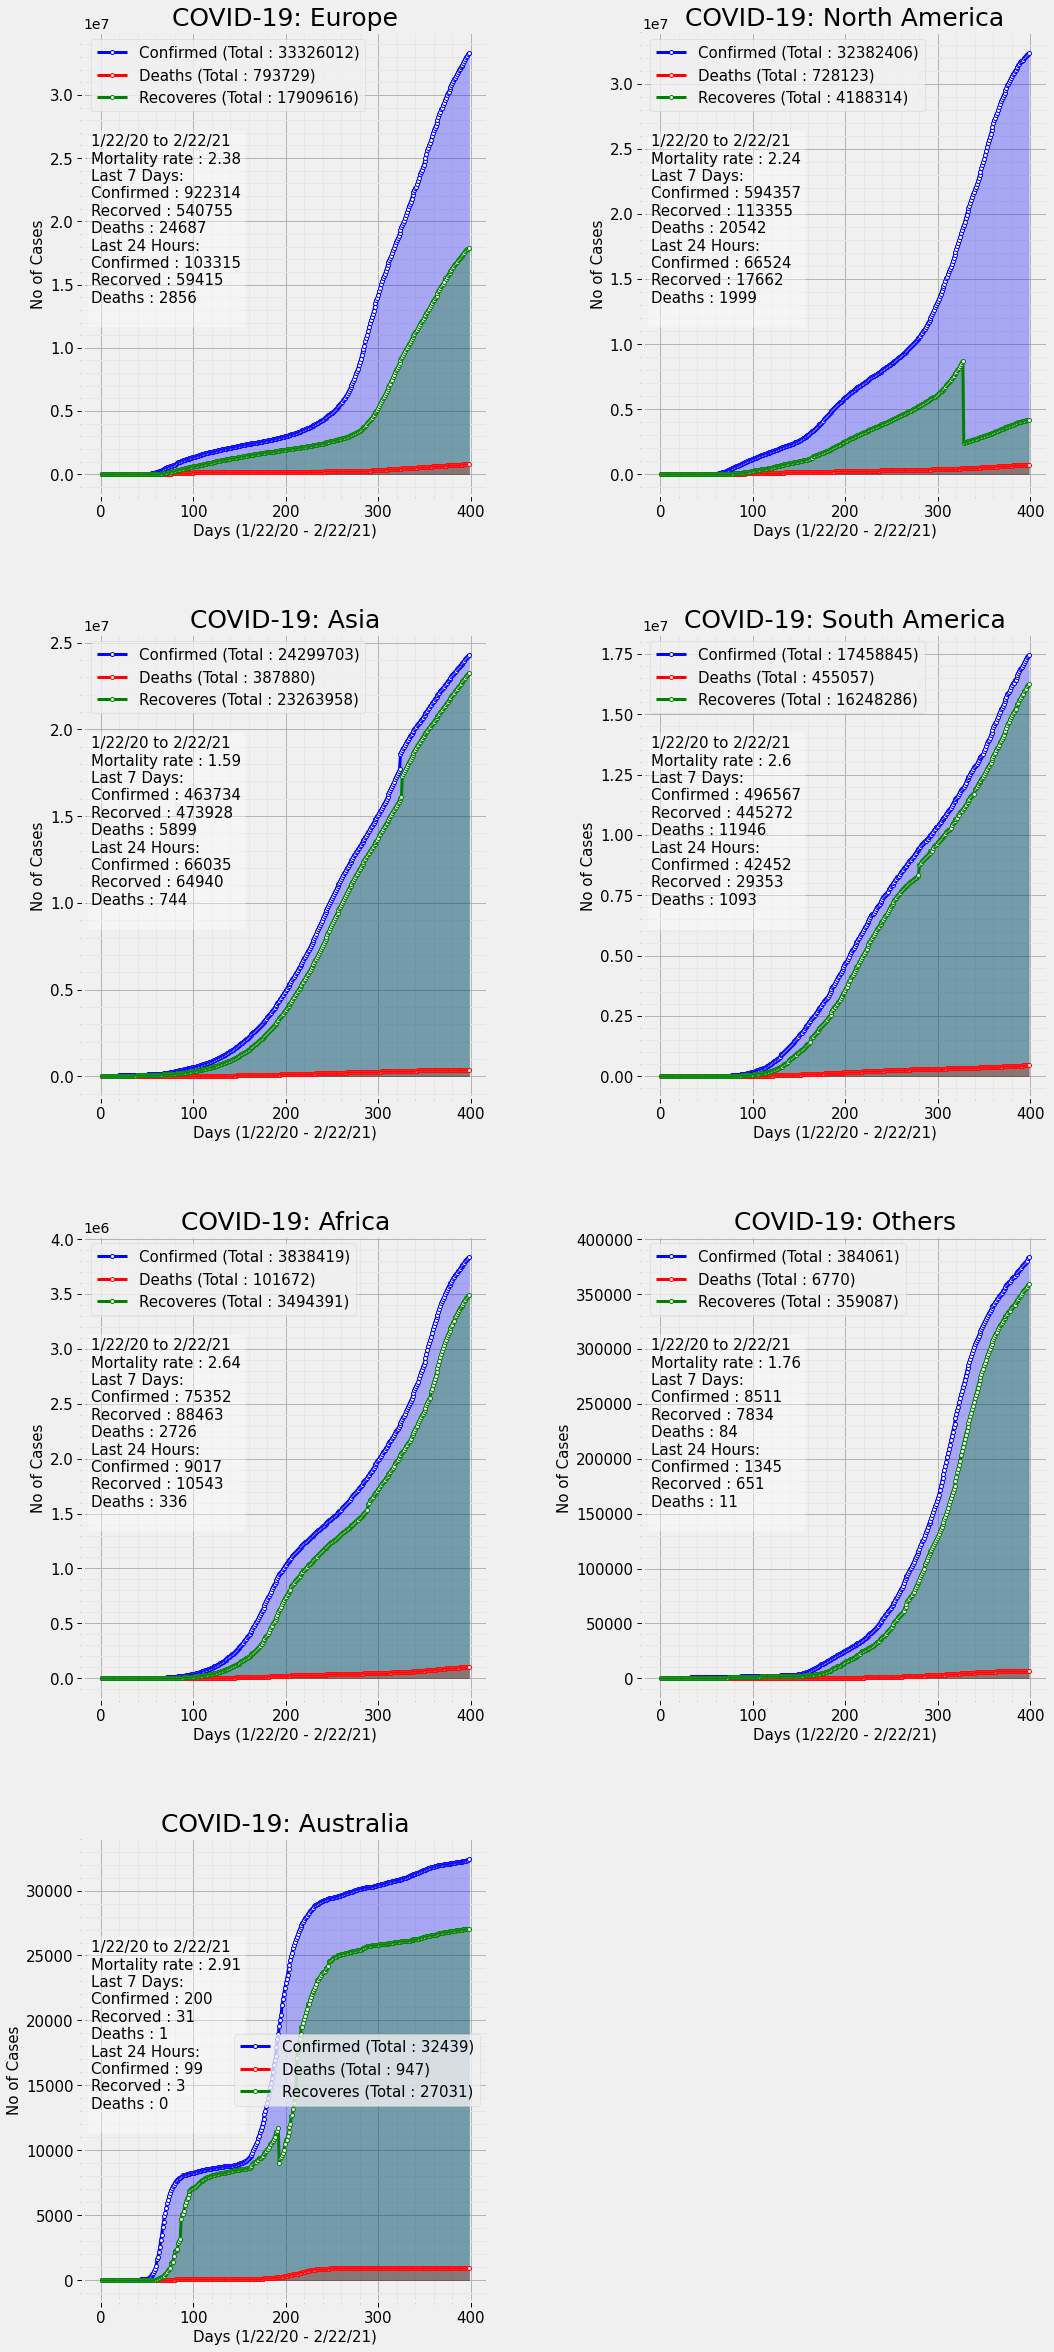

In [23]:
# Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths, recovers,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recovers]
    label = ["Confirmed", "Deaths", "Recoveres"]
    if continent != None:
        params = ["Continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        elif i == 2:
            cases_death = cases.copy()
            cases_recoveries = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
            cases = cases_death + cases_recoveries
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recovers = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recovers = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Recorved : " + str(Total_recovers[-1] - Total_recovers[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Recorved : " + str(Total_recovers[-1] - Total_recovers[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
continents = continents_df.sort_values(continents_df.columns[0],ascending = False).index
#print(continents)
cols =2
rows = int(np.ceil(len(continents)/cols))
f = plt.figure(figsize=(18,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

# Problem 12
    Visualize the covariance matrix for continents_df.

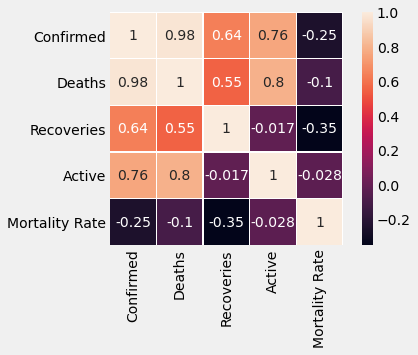

In [24]:
ax = sns.heatmap(continents_df.corr(), linewidths=0.1, square=True, annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

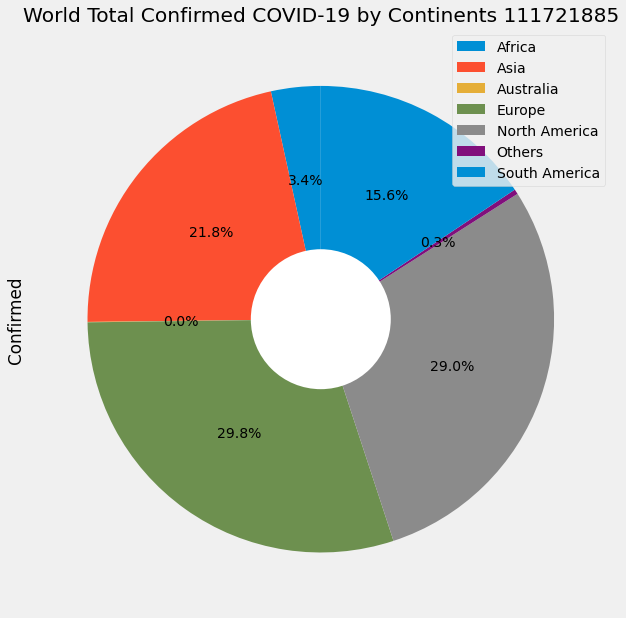

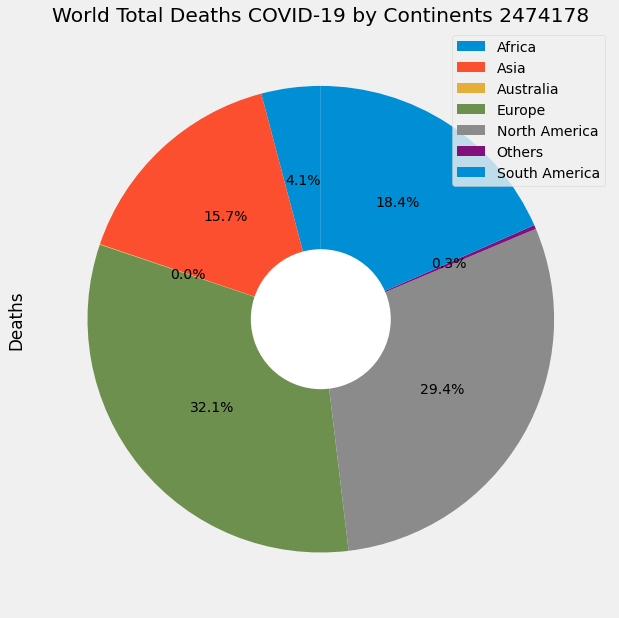

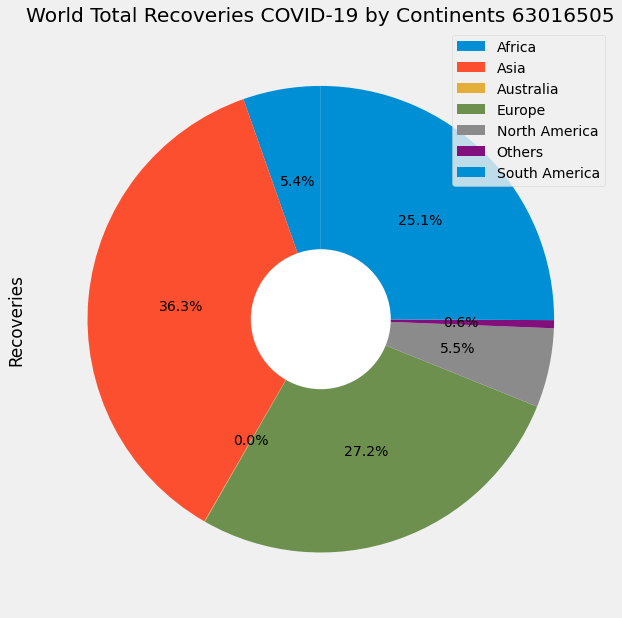

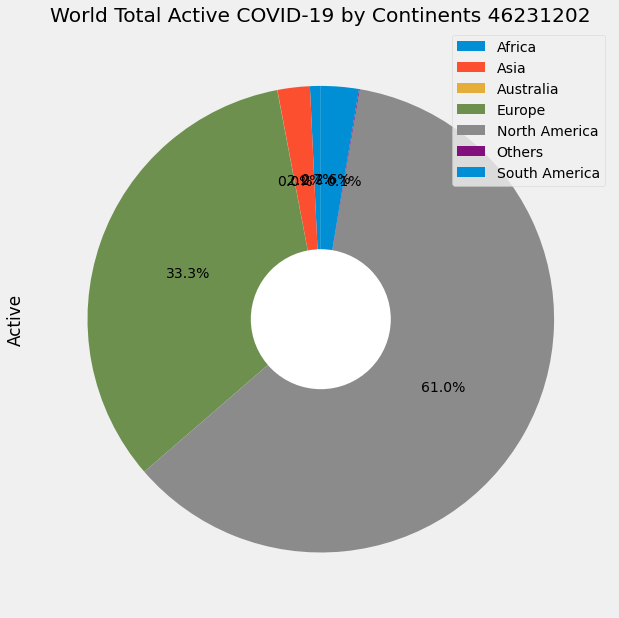

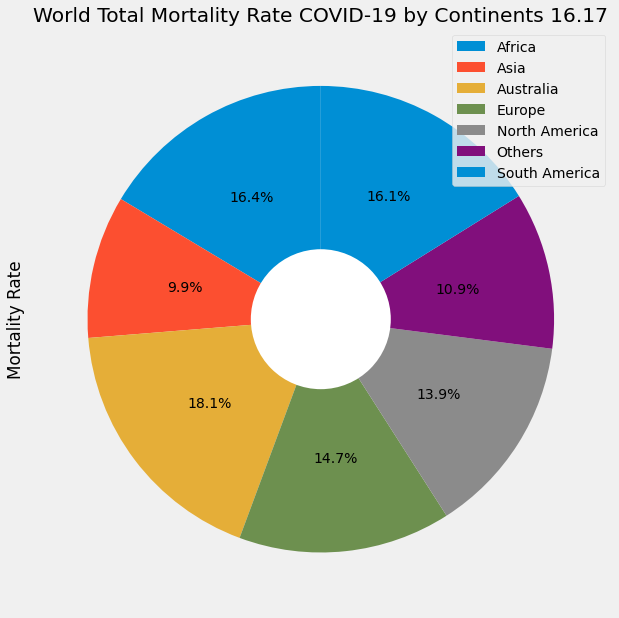

In [25]:
for i in continents_df.iloc[:,:]:
    # add total value of column for x
    x = continents_df[i].sum()
    continents_df[i].plot(kind='pie',
                            figsize=(12, 10),
                            labels=None,
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                         )
    # draw circle in the center of pie chart
    centre_circle = plt.Circle((0,0),0.30,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.title('World Total {}'.format(i) + ' COVID-19 by Continents {}'.format(x))

    plt.legend(labels=continents_df.index, loc='upper right')

    plt.show()


In [26]:
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

for i in continents_df.iloc[:,:]:
    # add total value of column for x
    x = continents_df[i].sum()

    trace = go.Pie(labels=continents_df.index, values=continents_df[i],
                   title='World Total {}'.format(i) + ' COVID-19 by Continents {}'.format(x),
                   hoverinfo='label+percent', textinfo='value', 
                   textfont=dict(size=10),
                   marker=dict(line=dict(color='#000000', width=1))
                  )
    iplot([trace])

4.14.3


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [41]:
# Insert your code here:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
index_list = list(countries_df.index)
for i in range(0,len(countries_df)):
    folium.Circle(
        location=[countries_df.iloc[i]['Lat'], countries_df.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+index_list[i]+"</h5>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(countries_df.iloc[i]['Confirmed'])+"</li>"+
        "<li>Deaths:   "+str(countries_df.iloc[i]['Deaths'])+"</li>" +
        "<li>Recovered:   "+str(countries_df.iloc[i]['Recoveries'])+"</li>" +
        "<li>Mortality Rate:   "+str(np.round(countries_df.iloc[i]['Deaths']/(countries_df.iloc[i]['Confirmed']+1.00001)*100,2))+"</li>"+
        "</ul>"
        ,
        radius=(int((np.log(countries_df.iloc[i]['Confirmed']+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [28]:
# Insert your code here:
temp_df = pd.DataFrame(countries_df['Active'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="Country/Region",
                    color=np.log10(temp_df["Active"]), # lifeExp is a column of gapminder
                    hover_name="Country/Region", # column to add to hover information
                    hover_data=["Active"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Active Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Active Cases(Log Scale)",colorscale="spectral")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()


C:\Users\tedom\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning:

divide by zero encountered in log10



In [49]:
# a map to show up the number of active of each country
temp_df = pd.DataFrame(countries_df['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="Country/Region",
                    color=temp_df["Deaths"], # lifeExp is a column of gapminder
                    hover_name="Country/Region", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Cividis_r,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Death Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Death Cases(Log Scale)")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()


# Problem 16
    Filter the top 10 countries baseđ on the number of confirmed cases.

In [29]:
df_top_10 = countries_df.groupby('Country/Region').sum()

df_top_10 = df_top_10.sort_values('Confirmed', ascending=False).head(10)
df_top_10

Lat        Long  Confirmed  Deaths  Recoveries  \
Country/Region                                                         
USA             40.000000 -100.000000   28190159  500310           0   
India           20.593684   78.962880   11016434  156463    10712665   
Brazil         -14.235000  -51.925300   10195160  247143     9108205   
United Kingdom  24.548173  -43.902242    4138233  120988       11342   
Russia          61.524010  105.318756    4130447   82255     3684955   
France           6.425300   -9.839634    3669354   84764      256748   
Spain           40.463667   -3.749220    3153971   67636      150376   
Italy           41.871940   12.567380    2818863   95992     2334968   
Turkey          38.963700   35.243300    2646526   28138     2529450   
Germany         51.165691   10.451526    2399499   68363     2212439   

                  Active  Mortality Rate  
Country/Region                            
USA             27689849            1.77  
India             147306            1.42  
Brazil            839812            2.42  
United Kingdom   4005903            2.92  
Russia            363237            1.99  
France           3327842            2.31  
Spain            2935959            2.14  
Italy             387903            3.41  
Turkey             88938            1.06  
Germany           118697            2.85

# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

Text(0, 0.5, 'Number of Case')

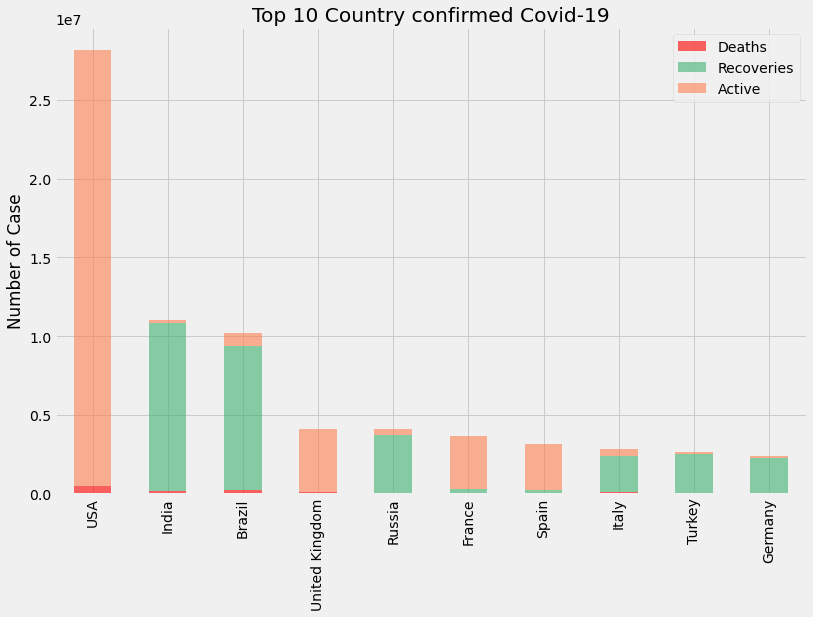

In [30]:
 
df_top_10.iloc[0:,3:6].plot(kind="bar",
                            color=['red','mediumseagreen','coral'],
                            stacked=True,
                            alpha=0.6,
                            figsize=(12,8)
                           )
plt.title("Top 10 Country confirmed Covid-19")
plt.xlabel(None)
plt.ylabel("Number of Case")


# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here: 
    According to a data visualization from 'World Daily Increases in Confirmed Recovery', the daily rate of infection has peaked at December 8, 2020 and tends to decrease, while from the 'Recovery Rate of Coronaviruse Over Time in Percentage' graph shows that the cure rate is increasing and surpassing the average value threshold. This shows that the control situation is progressing. European countries, however, appear to be losing control.

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:
19.1 North America.
19.2 Europe
19.3 Asia

In [31]:
continents_df.sort_values('Recoveries', ascending=False)
continents_df['new'] = continents_df['Deaths']-continents_df['Active']
continents_df['new_confirmed'] = continents_df['Confirmed']-continents_df['Active']

continents_df

Confirmed  Deaths  Recoveries    Active  Mortality Rate  \
continent                                                                
Africa           3838419  101672     3392719    344028            2.65   
Asia            24299703  387880    22876078   1035745            1.60   
Australia          32439     947       26084      5408            2.92   
Europe          33326012  793729    17115887  15416396            2.38   
North America   32382406  728123     3460191  28194092            2.25   
Others            384061    6770      352317     24974            1.76   
South America   17458845  455057    15793229   1210559            2.61   

                    new  new_confirmed  
continent                               
Africa          -242356        3494391  
Asia            -647865       23263958  
Australia         -4461          27031  
Europe        -14622667       17909616  
North America -27465969        4188314  
Others           -18204         359087  
South America   -755502       16248286

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:
20.1 Yemen
20.2 India
20.3 Samoa

In [32]:
# Which country has the highest death rate over countries' dataset?
countries_df['Death_rate'] = countries_df['Deaths']/countries_df['Confirmed']
countries_df.sort_values('Death_rate', ascending=False)

Lat        Long      continent  Confirmed  \
Country/Region                                                           
Yemen                  15.552727   48.516388           Asia       2176   
MS Zaandam              0.000000    0.000000         Others          9   
Mexico                 23.634500 -102.552800  North America    2043632   
Syria                  34.802075   38.996815           Asia      15230   
Sudan                  12.862800   30.217600         Africa      30128   
...                          ...         ...            ...        ...   
Micronesia              7.425600  150.550800      Australia          1   
Saint Kitts and Nevis  17.357822  -62.782998  North America         41   
Timor-Leste            -8.874217  125.727539         Others        103   
Laos                   19.856270  102.495496           Asia         45   
Holy See               41.902900   12.453400         Others         27   

                       Deaths  Recoveries  Active  Mortality Rate  Death_rate  
Country/Region                                                                 
Yemen                     619        1432     125           28.45    0.284467  
MS Zaandam                  2           7       0           22.22    0.222222  
Mexico                 180536     1602024  261072            8.83    0.088341  
Syria                    1001        9307    4922            6.57    0.065726  
Sudan                    1871       22797    5460            6.21    0.062102  
...                       ...         ...     ...             ...         ...  
Micronesia                  0           1       0            0.00    0.000000  
Saint Kitts and Nevis       0          39       2            0.00    0.000000  
Timor-Leste                 0          82      21            0.00    0.000000  
Laos                        0          42       3            0.00    0.000000  
Holy See                    0          15      12            0.00    0.000000  

[192 rows x 9 columns]

In [33]:
# Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
countries_df.sort_values('Active', ascending=False)

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                            
USA             40.000000 -100.000000  North America   28190159  500310   
United Kingdom  24.548173  -43.902242         Europe    4138233  120988   
France           6.425300   -9.839634         Europe    3669354   84764   
Spain           40.463667   -3.749220         Europe    3153971   67636   
Netherlands     21.408840  -52.992060         Europe    1075425   15372   
...                   ...         ...            ...        ...     ...   
Grenada         12.116500  -61.679000  North America        148       1   
Vanuatu        -15.376700  166.959200      Australia          1       0   
Micronesia       7.425600  150.550800      Australia          1       0   
MS Zaandam       0.000000    0.000000         Others          9       2   
Fiji           -17.713400  178.065000      Australia         56       2   

                Recoveries    Active  Mortality Rate  Death_rate  
Country/Region                                                    
USA                      0  27689849            1.77    0.017748  
United Kingdom       11342   4005903            2.92    0.029237  
France              256748   3327842            2.31    0.023101  
Spain               150376   2935959            2.14    0.021445  
Netherlands          14117   1045936            1.43    0.014294  
...                    ...       ...             ...         ...  
Grenada                147         0            0.68    0.006757  
Vanuatu                  1         0            0.00    0.000000  
Micronesia               1         0            0.00    0.000000  
MS Zaandam               7         0           22.22    0.222222  
Fiji                    54         0            3.57    0.035714  

[192 rows x 9 columns]

In [34]:
# Which country has the highest recoveries rate over countries' dataset?
countries_df['Recovery_rate'] = countries_df['Recoveries']/countries_df['Confirmed']
countries_df.sort_values('Recovery_rate', ascending=False)

Lat        Long      continent  Confirmed  Deaths  \
Country/Region                                                              
Marshall Islands   7.131500  171.184500      Australia          4       0   
Micronesia         7.425600  150.550800      Australia          1       0   
Vanuatu          -15.376700  166.959200      Australia          1       0   
Singapore          1.283300  103.833300           Asia      59879      29   
Bhutan            27.514200   90.433600           Asia        866       1   
...                     ...         ...            ...        ...     ...   
United Kingdom    24.548173  -43.902242         Europe    4138233  120988   
USA               40.000000 -100.000000  North America   28190159  500310   
Belgium           50.833300    4.469936         Europe     755594   21923   
Sweden            60.128161   18.643501         Europe     631166   12649   
Serbia            44.016500   21.005900         Europe     439596    4351   

                  Recoveries    Active  Mortality Rate  Death_rate  \
Country/Region                                                       
Marshall Islands           4         0            0.00    0.000000   
Micronesia                 1         0            0.00    0.000000   
Vanuatu                    1         0            0.00    0.000000   
Singapore              59746       104            0.05    0.000484   
Bhutan                   862         3            0.12    0.001155   
...                      ...       ...             ...         ...   
United Kingdom         11342   4005903            2.92    0.029237   
USA                        0  27689849            1.77    0.017748   
Belgium                    0    733671            2.90    0.029014   
Sweden                     0    618517            2.00    0.020041   
Serbia                     0    435245            0.99    0.009898   

                  Recovery_rate  
Country/Region                   
Marshall Islands       1.000000  
Micronesia             1.000000  
Vanuatu                1.000000  
Singapore              0.997779  
Bhutan                 0.995381  
...                         ...  
United Kingdom         0.002741  
USA                    0.000000  
Belgium                0.000000  
Sweden                 0.000000  
Serbia                 0.000000  

[192 rows x 10 columns]

# Problem 21
**USA dataset**

In [35]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

21.1 Connecticut	
21.2 New York
21.3 Minnesota	

In [36]:
#Insert your code here:
df = us_medical_data
df['Death_rate'] = df['Deaths']/df['Confirmed']
df['Recovery_rate'] = df['Recovered']/df['Confirmed']
df_top_10 = df.sort_values('Confirmed', ascending=False).head(10)
df_top_10

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657  -74.9481   
5      California             US  2020-07-07 04:34:13  36.1162 -119.6816   
11        Florida             US  2020-07-07 04:34:13  27.7663  -81.6868   
49          Texas             US  2020-07-07 04:34:13  31.0545  -97.5635   
34     New Jersey             US  2020-07-07 04:34:13  40.2989  -74.5210   
17       Illinois             US  2020-07-07 04:34:13  40.3495  -88.9861   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
12        Georgia             US  2020-07-07 04:34:13  33.0406  -83.6431   
43   Pennsylvania             US  2020-07-07 04:34:13  40.5908  -77.2098   

    Confirmed  Deaths  Recovered    Active  FIPS  Incident_Rate  \
36     397649   32219    71040.0  294390.0    36    2044.093624   
5      279891    6441        NaN  264594.0     6     685.952294   
11     206447    3778        NaN  202669.0    12     961.213930   
49     206410    2872   103782.0   99183.0    48     709.211077   
34     174766   15229    30729.0  127653.0    34    1954.596783   
17     147865    7026        NaN  140839.0    17    1166.880435   
25     110137    8198    93157.0    8782.0    25    1597.924586   
3      101455    1829    11836.0   87790.0     4    1393.858286   
12      97064    2878        NaN   94186.0    13     914.195469   
43      95100    6754    70437.0   17909.0    42     742.853318   

    People_Tested  People_Hospitalized  Mortality_Rate       UID ISO3  \
36      4288131.0              89995.0        8.102372  84000036  USA   
5       4793353.0                  NaN        2.376446  84000006  USA   
11      2233940.0              16352.0        1.830010  84000012  USA   
49      2163729.0                  NaN        1.301777  84000048  USA   
34      1549209.0              20237.0        8.771910  84000034  USA   
17      1783962.0                  NaN        4.751632  84000017  USA   
25       899417.0              11469.0        7.443457  84000025  USA   
3        617841.0               5188.0        1.802770  84000004  USA   
12       958953.0              11919.0        2.965054  84000013  USA   
43       833324.0                  NaN        7.101998  84000042  USA   

    Testing_Rate  Hospitalization_Rate  Death_rate  Recovery_rate  
36  22042.910293             22.631768    0.081024       0.178650  
5   12131.316935                   NaN    0.023013            NaN  
11  10401.188915              7.920677    0.018300            NaN  
49   7462.194372                   NaN    0.013914       0.502795  
34  17441.745786             11.656519    0.087139       0.175829  
17  14078.181818                   NaN    0.047516            NaN  
25  13049.207233             10.413394    0.074435       0.845828  
3    8488.322873              5.113597    0.018028       0.116663  
12   9031.880900             12.279527    0.029651            NaN  
43   6509.332261                   NaN    0.071020       0.740662

# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [37]:
import plotly
from plotly import __version__
print (__version__)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

x = df_top_10.Confirmed
y = df_top_10.Deaths

iplot([go.Histogram2dContour(x=x, y=y, contours=dict(coloring='heatmap')),
       go.Scatter(x=x, y=y, mode='markers', marker=dict(color='white', size=3, opacity=0.3))], show_link=False)

4.14.3


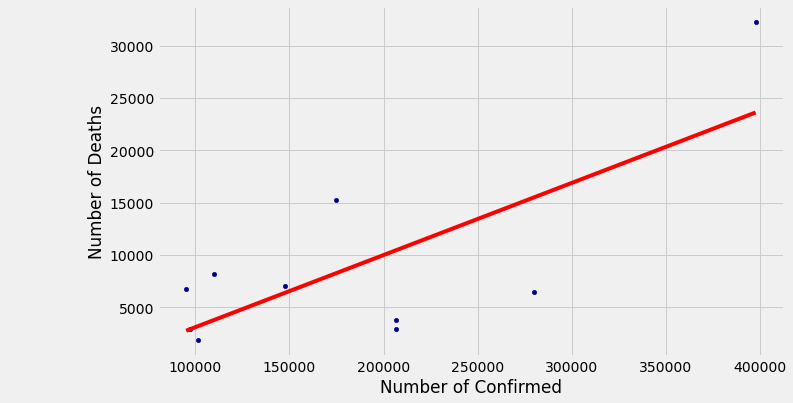

In [38]:
x = df_top_10['Confirmed']      # year on x-axis
y = df_top_10['Deaths']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

df_top_10.plot(kind='scatter', x='Confirmed', y='Deaths', figsize=(10, 6), color='darkblue')

plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(20, 20))

plt.xlabel('Number of Confirmed')
plt.ylabel('Number of Deaths')

plt.show()

In [39]:
x = df_top_10['Confirmed']
y = df_top_10['Deaths']
z = df_top_10['Recovered']

trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
    size=12,
    color=z,
    colorscale='Viridis',
    opacity=0.8))

data = [trace1]
layout = go.Layout(
    margin=dict(
    l=0,
    r=0,
    b=0,
    t=0)
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='3d-pubg-plot')